# Code for training of model

## 1. Loading of dependencies and the dataset

In [33]:
# Libraries and imports required

try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Scikit-learn libraries
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report,confusion_matrix
    from sklearn import tree
    
    #Pickle
    import pickle

    # For inlining of plots
    %matplotlib inline

except:
    print("An error occurred while importing modules. Please verify the presence and/or compatibility of all dependencies.")
    
else:
    print("All modules have been imported successfully.")

All modules have been imported successfully.


In [34]:
# Importing Dataset as df
df = pd.read_csv('Database/dataset.csv')

# Randomization of sequence of data values
df = df.sample(frac=1)

# Glimpse of dataset
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
814,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4671,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2233,Typhoid,chills,vomiting,fatigue,high_fever,headache,nausea,constipation,diarrhoea,toxic_look_(typhos),belly_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,Arthritis,muscle_weakness,stiff_neck,movement_stiffness,painful_walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2262,Hepatitis C,yellowish_skin,nausea,loss_of_appetite,yellowing_of_eyes,family_history,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Dataset stats
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Impetigo,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,stomach_bleeding,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


## 2. Exploratory Data Analytics

In [36]:
# Determining number of null values by symptoms
nulls = df.isna().sum()[1:]
nulls

Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

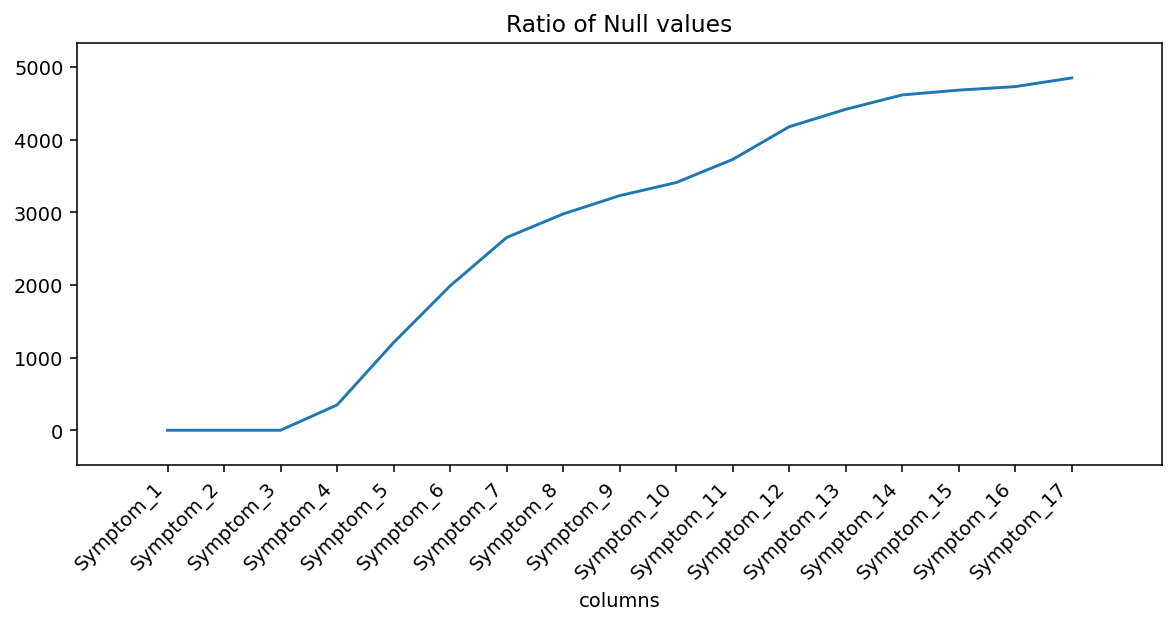

In [37]:
# Plot of null values
plt.figure(figsize=(10,4), dpi=140)
plt.plot(nulls.index, nulls.values)
plt.xticks(nulls.index, nulls.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('columns')
plt.margins(0.1)
plt.savefig('Ratio of null values graph.png')

## 3. Preprocessing and Feature Engineering

In [38]:
# Removal of blank spaces
for col in df.columns:
    
    # We would like to retain the space present in the disease column to later retrieve precautions and description
    # from database easily
    if col != 'Disease':
        df[col] = df[col].str.replace(' ', '')
    
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
814,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4671,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2233,Typhoid,chills,vomiting,fatigue,high_fever,headache,nausea,constipation,diarrhoea,toxic_look_(typhos),belly_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,Arthritis,muscle_weakness,stiff_neck,movement_stiffness,painful_walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2262,Hepatitis C,yellowish_skin,nausea,loss_of_appetite,yellowing_of_eyes,family_history,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_symptom = pd.read_csv('Database/Symptom-severity.csv')

In [40]:
df_symptom.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [41]:
# Assigning a numeral (code) to each symptom
df_symptom['Code'] = list(range(1,len(df_symptom) + 1))
df_symptom.head()

,Symptom,weight,Code
0,itching,1,1
1,skin_rash,3,2
2,nodal_skin_eruptions,4,3
3,continuous_sneezing,4,4
4,shivering,5,5


In [42]:
# Encoding of symptoms
vals = df.values
symptoms = df_symptom['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_symptom[df_symptom['Symptom'] == symptoms[i]]['Code'].values[0]

df_processed = pd.DataFrame(vals, columns=df.columns)
df_processed.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Impetigo,2,130,131,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Urinary tract infection,13,90,91,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Typhoid,6,12,15,26,32,35,39,41,95,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arthritis,81,82,84,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hepatitis C,33,35,36,44,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Helper function for encoding values -- To be encapsulated in pickle file

codes = dict(zip(df_symptom['Symptom'],df_symptom['Code']))
def label_encoder(symptoms):
    encoded_values = []
    for symptom in symptoms:
        encoded_values.append(codes[symptom])
    n = len(encoded_values)
    if n < 17:
        encoded_values += [0]*(17-n)
    elif n > 17:
        encoded_values = encoded_values[:17]
    else:
        pass
    return encoded_values

In [44]:
print([1,2,3][:2])

[1, 2]


In [45]:
# The cleaned dataset
df_processed = df_processed.fillna(0)
df_processed.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Impetigo,2,130,131,132,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Urinary tract infection,13,90,91,92,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Typhoid,6,12,15,26,32,35,39,41,95,101,0,0,0,0,0,0,0
3,Arthritis,81,82,84,122,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hepatitis C,33,35,36,44,107,0,0,0,0,0,0,0,0,0,0,0,0


## 4. Model training

In [46]:
# Extracting attributes and target values
data = df_processed.iloc[:,1:].values
labels = df['Disease'].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=0.6, 
                                                    random_state=42)

In [48]:
# Decision Tree Classifier Object
try:
    dtree = DecisionTreeClassifier()
except:
    print("Error occurred. Please check scikit version")
else:
    print("Classifier created successfully!")

Classifier created successfully!


In [49]:
# Model Training
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
# Prediction
predictions = dtree.predict(X_test)

In [51]:
# Classification Report
print(classification_report(y_test,predictions))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        75
                                   AIDS       1.00      1.00      1.00        80
                                   Acne       1.00      1.00      1.00        82
                    Alcoholic hepatitis       1.00      1.00      1.00        80
                                Allergy       1.00      1.00      1.00        68
                              Arthritis       1.00      1.00      1.00        73
                       Bronchial Asthma       1.00      1.00      1.00        65
                   Cervical spondylosis       1.00      1.00      1.00        75
                            Chicken pox       1.00      1.00      1.00        67
                    Chronic cholestasis       1.00      1.00      1.00        78
                            Common Cold       1.00      1.00      1.00        60
                           

In [24]:
dtree.predict([label_encoder("nodal_skin_eruptions,itching,skin_rash,dischromic_patches".split(","))])

array(['Fungal infection'], dtype=object)

In [25]:
[label_encoder("nodal_skin_eruptions,itching,skin_rash,dischromic_patches".split(","))]

[[3, 1, 2, 103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [27]:
dtree.predict([[103,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array(['GERD'], dtype=object)

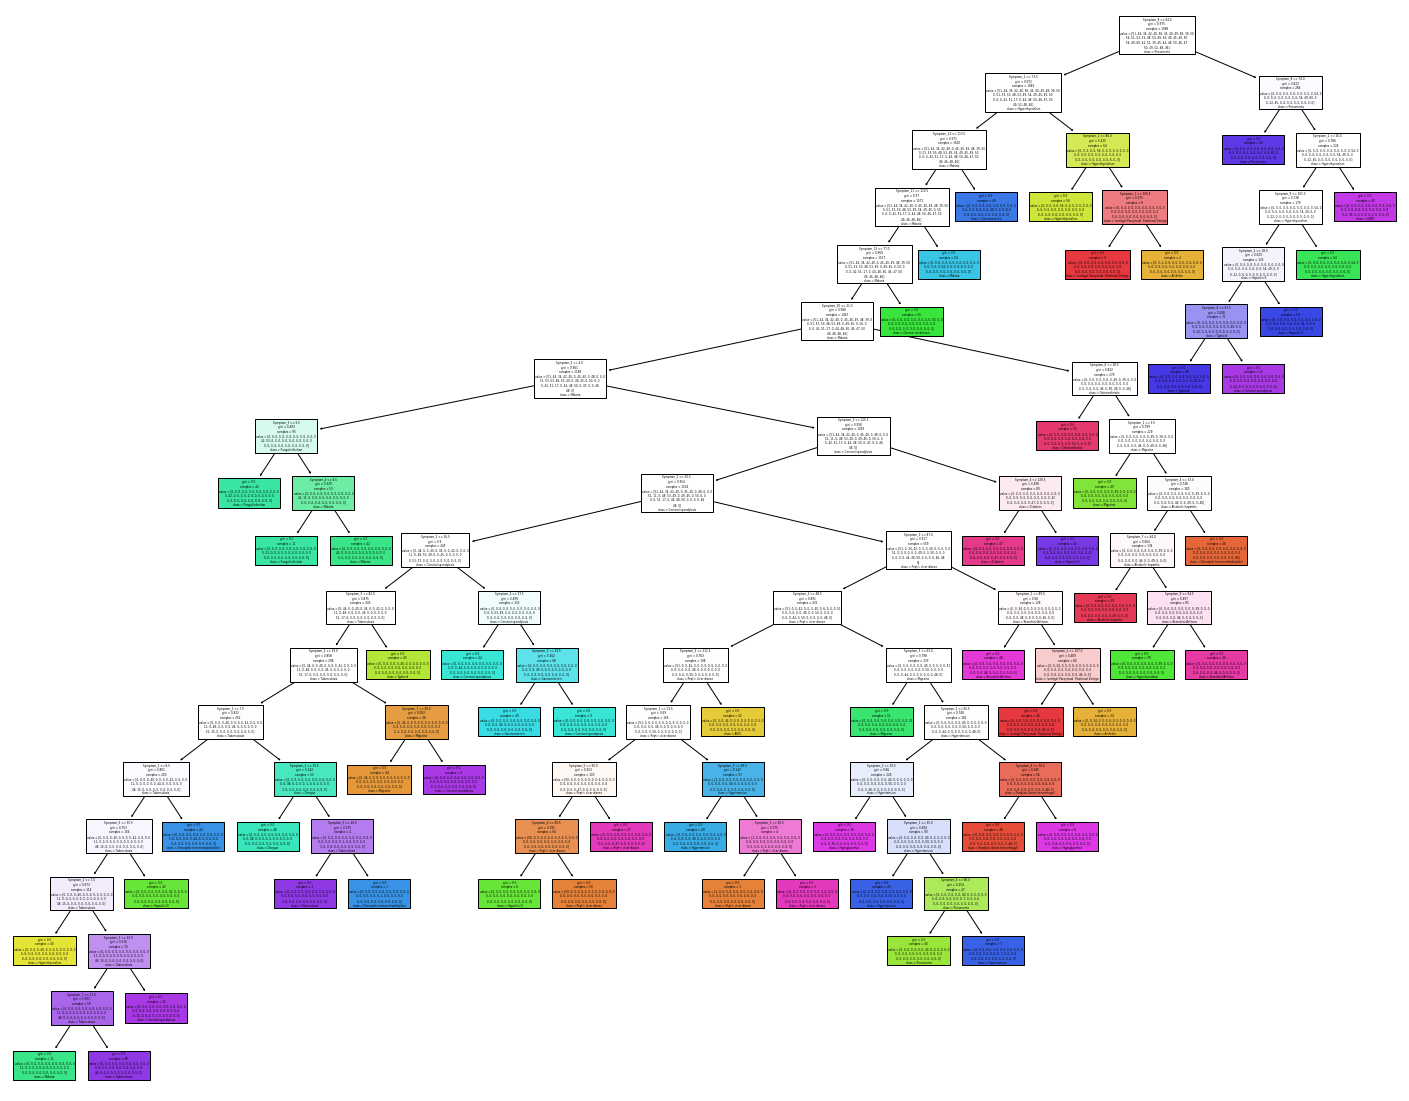

In [20]:
# Plot for decision tree thus obtained
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=list(df.columns[1:]),  
                   class_names=df['Disease'].values,
                   filled=True)
plt.savefig('full-dtree-100.png')

## 5. Pickling the model

In [21]:
# Saving the model for later use
data = {"model":dtree,"codes":codes}
with open("data.pkl","wb") as file:
    pickle.dump(data,file)

'''

FOR LOADING THE MODEL
=== ======= === =====

with open("data.pkl","rb") as file:
    data = pickle.load(file)

model = data["model"]
codes = data["codes"]
label_encoder = data["label_encoder"]

predictions = model.predict(label_encoder(inputs))

'''

'\n\nFOR LOADING THE MODEL\n=== ======= === =====\n\nwith open("data.pkl","rb") as file:\n    data = pickle.load(file)\n\nmodel = data["model"]\ncodes = data["codes"]\nlabel_encoder = data["label_encoder"]\n\npredictions = model.predict(label_encoder(inputs))\n\n'

## Saved tests
_Note: The following section retains the tests made as a part of experimentation. **Do not run the following blocks of code.**_

### Training a Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 3)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
'''
MODEL TEST
===== ====

Test Case-
Expected Result : Arthritis
Symptoms- Pain, Stiffness, Swelling, Redness, Decreased range of motion
Symptoms: [7,82,83,84,87,0,0,0,0,0,0,0,0,0,0,0,0]

'''

In [ ]:
X_train.shape

In [ ]:
y_test[0]

In [ ]:
test_pred = dtree.predict([[7,82,83,84,87,0,0,0,0,0,0,0,0,0,0,0,0]])
print(test_pred)

In [ ]:
test_pred2 = dtree.predict([[25,7,3,89,88,87,0,0,0,0,0,0,0,0,0,0,0]])
print(test_pred2)
print(dtree.predict_proba([[25,7,3,89,88,87,0,0,0,0,0,0,0,0,0,0,0]]))

In [24]:
dtree.predict([label_encoder("itching,skin_rash,nodal_skin_eruptions,dischromic_patches".split(","))])


array(['Fungal infection'], dtype=object)

In [1]:
import pickle
with open("data.pkl","rb") as file:
    data = pickle.load(file)

model = data["model"]
model.predict([[103, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

C:\Anaconda\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array(['Urinary tract infection'], dtype=object)

## Testing word-comparison feature


In [1]:
import spacy

ModuleNotFoundError: No module named 'scispacy'

In [3]:
nlp = spacy.load("en_core_web_md")

In [4]:
print(nlp('nausea').similarity(nlp('vomitting')))

0.8932694311283732


In [57]:
import numpy as np
import pandas as pd

df = pd.read_csv("Database/Symptom-severity.csv")
df.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [60]:
df['Symptom'] = df['Symptom'].str.replace(' ','')
df['Symptom'] = df['Symptom'].str.replace('_',' ')

In [61]:
df.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [99]:
text = input("Enter symptom: ")
similarities = {}
for symptom in df['Symptom'].values:
    similarities[symptom] = nlp(text).similarity(nlp(symptom))
print(similarities)
keymax = "No matching symptom found!" if max(similarities.values()) == 0 else max(similarities, key= lambda x: similarities[x])
print("Closest matching symptom : " + str(keymax))

Enter symptom: stiffness
{'itching': 0.501259017491758, 'skin rash': 0.4719122838565206, 'nodal skin eruptions': 0.3344844935810268, 'continuous sneezing': 0.5181864098768051, 'shivering': 0.5904352999200408, 'chills': 0.4957344838068389, 'joint pain': 0.594961571912094, 'stomach pain': 0.6307885304779616, 'acidity': 0.10596375947799795, 'ulcers on tongue': 0.4384387691786386, 'muscle wasting': 0.547866773731209, 'vomiting': 0.5760199780192419, 'burning micturition': 0.46640434448203566, 'spotting urination': 0.4046436796422037, 'fatigue': 1.0000000233302964, 'weight gain': 0.4855281026878852, 'anxiety': 0.6543119999619211, 'cold hands and feets': 0.3761234424215846, 'mood swings': 0.5306785800333835, 'weight loss': 0.5396448702630379, 'restlessness': 0.6912916965101313, 'lethargy': 0.6960115978200132, 'patches in throat': 0.3963107483231128, 'irregular sugar level': 0.4887008754404888, 'cough': 0.4366632823185475, 'high fever': 0.533304074676246, 'sunken eyes': 0.2651956351913496, 'br

C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_9044/2593234594.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarities[symptom] = nlp(text).similarity(nlp(symptom))


In [4]:
t1 = 'headache'
t2 = 'pain'
nlp(t1).similarity(nlp(t2))

C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_1480/3201679974.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  nlp(t1).similarity(nlp(t2))
C:\Users\SHREYA~1\AppData\Local\Temp/ipykernel_1480/3201679974.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  nlp(t1).similarity(nlp(t2))


0.0

In [90]:
rando = {'itching': 0.0, 'skin rash': 0.0, 'nodal skin eruptions': 0.0, 'continuous sneezing': 0.0, 'shivering': 0.0, 'chills': 0.0, 'joint pain': 0.0, 'stomach pain': 0.0, 'acidity': 0.0, 'ulcers on tongue': 0.0, 'muscle wasting': 0.0, 'vomiting': 0.0, 'burning micturition': 0.0, 'spotting urination': 0.0, 'fatigue': 0.0, 'weight gain': 0.0, 'anxiety': 0.0, 'cold hands and feets': 0.0, 'mood swings': 0.0, 'weight loss': 0.0, 'restlessness': 0.0, 'lethargy': 0.0, 'patches in throat': 0.0, 'irregular sugar level': 0.0, 'cough': 0.0, 'high fever': 0.0, 'sunken eyes': 0.0, 'breathlessness': 0.0, 'sweating': 0.0, 'dehydration': 0.0, 'indigestion': 0.0, 'headache': 0.0, 'yellowish skin': 0.0, 'dark urine': 0.0, 'nausea': 0.0, 'loss of appetite': 0.0, 'pain behind the eyes': 0.0, 'back pain': 0.0, 'constipation': 0.0, 'abdominal pain': 0.0, 'diarrhoea': 0.0, 'mild fever': 0.0, 'yellow urine': 0.0, 'yellowing of eyes': 0.0, 'acute liver failure': 0.0, 'fluid overload': 0.0, 'swelling of stomach': 0.0, 'swelled lymph nodes': 0.0, 'malaise': 0.0, 'blurred and distorted vision': 0.0, 'phlegm': 0.0, 'throat irritation': 0.0, 'redness of eyes': 0.0, 'sinus pressure': 0.0, 'runny nose': 0.0, 'congestion': 0.0, 'chest pain': 0.0, 'weakness in limbs': 0.0, 'fast heart rate': 0.0, 'pain during bowel movements': 0.0, 'pain in anal region': 0.0, 'bloody stool': 0.0, 'irritation in anus': 0.0, 'neck pain': 0.0, 'dizziness': 0.0, 'cramps': 0.0, 'bruising': 0.0, 'obesity': 0.0, 'swollen legs': 0.0, 'swollen blood vessels': 0.0, 'puffy face and eyes': 0.0, 'enlarged thyroid': 0.0, 'brittle nails': 0.0, 'swollen extremeties': 0.0, 'excessive hunger': 0.0, 'extra marital contacts': 0.0, 'drying and tingling lips': 0.0, 'slurred speech': 0.0, 'knee pain': 0.0, 'hip joint pain': 0.0, 'muscle weakness': 0.0, 'stiff neck': 0.0, 'swelling joints': 0.0, 'movement stiffness': 0.0, 'spinning movements': 0.0, 'loss of balance': 0.0, 'unsteadiness': 0.0, 'weakness of one body side': 0.0, 'loss of smell': 0.0, 'bladder discomfort': 0.0, 'foul smell ofurine': 0.0, 'continuous feel of urine': 0.0, 'passage of gases': 0.0, 'internal itching': 0.0, 'toxic look (typhos)': 0.0, 'depression': 0.0, 'irritability': 0.0, 'muscle pain': 0.0, 'altered sensorium': 0.0, 'red spots over body': 0.0, 'belly pain': 0.0, 'abnormal menstruation': 0.0, 'dischromic patches': 0.0, 'watering from eyes': 0.0, 'increased appetite': 0.0, 'polyuria': 0.0, 'family history': 0.0, 'mucoid sputum': 0.0, 'rusty sputum': 0.0, 'lack of concentration': 0.0, 'visual disturbances': 0.0, 'receiving blood transfusion': 0.0, 'receiving unsterile injections': 0.0, 'coma': 0.0, 'stomach bleeding': 0.0, 'distention of abdomen': 0.0, 'history of alcohol consumption': 0.0, 'blood in sputum': 0.0, 'prominent veins on calf': 0.0, 'palpitations': 0.0, 'painful walking': 0.0, 'pus filled pimples': 0.0, 'blackheads': 0.0, 'scurring': 0.0, 'skin peeling': 0.0, 'silver like dusting': 0.0, 'small dents in nails': 0.0, 'inflammatory nails': 0.0, 'blister': 0.0, 'red sore around nose': 0.0, 'yellow crust ooze': 0.0, 'prognosis': 0.0}

In [94]:
max(rando.values())

0.0

In [55]:
df = pd.read_csv("Database/Symptom-severity.csv")
df['Symptom'] = df['Symptom'].str.replace(' ','')
df['Symptom'] = df['Symptom'].str.replace('_',' ')

In [64]:
def order(symptom_code):
    symptom_name = list(codes.keys())[list(codes.values()).index(symptom_code)]
    symptom_name = symptom_name.replace(' ','').replace('_',' ')
    weight = int(df[df['Symptom'] == symptom_name]['weight'])
    return weight

In [65]:
order(103)

6

In [54]:
df['Symptom']

KeyError: 'Symptom'

## Testing early stopping

In [ ]:
esdt = DecisionTreeClassifier(max_depth=10)

In [ ]:
esdt.fit(X_train,y_train)

In [ ]:
predictions = esdt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))